# Importing libraries

In [1]:
import geopandas as gpd                   # for handling geospacial data
from datetime import datetime             # for manipulating dates

import matplotlib.pyplot as plt           # for plotting
%matplotlib inline

# Importing data

In [2]:
current_url='https://opendata.arcgis.com/datasets/620c2ab925f64ed5979d251ba7753b7f_0.geojson' 
current_data = gpd.read_file(current_url)

In [3]:
# converting projection from EPSG:4326 (World Geodetic System 1984, used in GPS)
# to EPSG:3857 - Pseudo-Mercator (Spherical Mercator, Google Maps, OpenStreetMap, Bing, ArcGIS, ESRI)

current_data.crs = {"init": "epsg:4326"}
current_data = current_data.to_crs(epsg=3857)

# Inspecting data

In [4]:
type(current_data)

geopandas.geodataframe.GeoDataFrame

In [5]:
current_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Gemeentenaam              355 non-null    object  
 1   Gemeentecode              355 non-null    object  
 2   Gemeentenummer            355 non-null    int64   
 3   Provincie                 355 non-null    object  
 4   Provinciecode             355 non-null    object  
 5   Provincienummer           355 non-null    int64   
 6   Veiligheidsregio          355 non-null    object  
 7   Veiligheidsregiocode      355 non-null    object  
 8   Veiligheidsregionummer    355 non-null    int64   
 9   GGD_regio                 355 non-null    object  
 10  GGD_regiocode             355 non-null    object  
 11  GGD_regionummer           355 non-null    int64   
 12  Shape__Area               355 non-null    float64 
 13  Shape__Length             355 non-null    

In [6]:
current_data.rename(
    columns = {'Gemeentenaam':'Municipality', 
               'Gemeentecode':'MunicipalityCode',
               'Gemeentenummer':'MunicipalityNumber', 
               'Provincie':'Province', 
               'Provinciecode':'ProvinceCode',
               'Provincienummer':'ProvinceNumber',
               'Veiligheidsregio':'SecurityRegion',
               'Veiligheidsregiocode':'SecurityRegionCode',
               'Veiligheidsregionummer':'SecuretyRegionCode',
               'GGD_regio':'GGD_Region',
               'GGD_regiocode':'GGD_RegionCode',
               'GGD_regionummer':'GGD_RegionNumber',
               'Datum':'Date', 
               'Meldingen':'Reported',
               'Ziekenhuisopnamen':'Hospitalized',
               'Overleden':'Deaths',
               'Bevolkingsaantal':'Population',
               'Meldingen_100000':'Reported_100000', 
               'Ziekenhuisopnamen_100000':'Hospitalized_100000',
               'Overleden_100000':'Deaths_100000'},
    inplace = True)

In [7]:
current_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Municipality         355 non-null    object  
 1   MunicipalityCode     355 non-null    object  
 2   MunicipalityNumber   355 non-null    int64   
 3   Province             355 non-null    object  
 4   ProvinceCode         355 non-null    object  
 5   ProvinceNumber       355 non-null    int64   
 6   SecurityRegion       355 non-null    object  
 7   SecurityRegionCode   355 non-null    object  
 8   SecuretyRegionCode   355 non-null    int64   
 9   GGD_Region           355 non-null    object  
 10  GGD_RegionCode       355 non-null    object  
 11  GGD_RegionNumber     355 non-null    int64   
 12  Shape__Area          355 non-null    float64 
 13  Shape__Length        355 non-null    float64 
 14  Date                 355 non-null    int64   
 15  Reported       

In [8]:
current_data.head()

,Municipality,MunicipalityCode,MunicipalityNumber,Province,ProvinceCode,ProvinceNumber,SecurityRegion,SecurityRegionCode,SecuretyRegionCode,GGD_Region,...,Date,Reported,Hospitalized,Deaths,Population,Reported_100000,Hospitalized_100000,Deaths_100000,ObjectId,geometry
0,'s-Gravenhage,GM0518,518,Zuid-Holland,PV28,28,Haaglanden,VR15,15,GGD Haaglanden,...,1588550400000,1181,281,164,545163,216.6,51.5,30.1,1,"MULTIPOLYGON (((478992.421 6823367.132, 482000..."
1,'s-Hertogenbosch,GM0796,796,Noord-Brabant,PV30,30,Brabant-Noord,VR21,21,GGD Hart voor Brabant,...,1588550400000,441,124,71,155113,284.3,79.9,45.8,2,"POLYGON ((589042.041 6741542.364, 588942.521 6..."
2,Aa en Hunze,GM1680,1680,Drenthe,PV22,22,Drenthe,VR03,3,GGD Drente,...,1588550400000,14,1,0,25453,55.0,3.9,0.0,3,"POLYGON ((740118.055 6987870.421, 739680.032 6..."
3,Aalsmeer,GM0358,358,Noord-Holland,PV27,27,Amsterdam-Amstelland,VR13,13,GGD Amsterdam,...,1588550400000,37,9,2,31857,116.1,28.3,6.3,4,"POLYGON ((528400.146 6849502.925, 528785.477 6..."
4,Aalten,GM0197,197,Gelderland,PV25,25,Noord- en Oost-Gelderland,VR06,6,GGD Noord- en Oost-Gelderland,...,1588550400000,53,6,5,27117,195.4,22.1,18.4,5,"POLYGON ((720912.219 6782420.245, 720656.029 6..."


In [9]:
timestamp=current_data['Date'][0]
date=datetime.fromtimestamp(timestamp/1000).strftime('%d %b %Y') 
print('Current date:',date)

Current date: 04 May 2020


In [10]:
current_data.sort_values(by ='Reported_100000', ascending=False)[[
        'Municipality', 'Province', 'Reported_100000']].head()

,Municipality,Province,Reported_100000
127,Heerde,Gelderland,973.8
163,Landerd,Noord-Brabant,870.9
37,Bernheze,Noord-Brabant,832.1
45,Boekel,Noord-Brabant,816.0
62,Cranendonck,Noord-Brabant,765.4


In [11]:
current_data.sort_values(by ='Reported_100000', ascending=True)[[
        'Municipality', 'Province', 'Reported_100000']].head()

,Municipality,Province,Reported_100000
308,Vlieland,Friesland,0.0
259,Schiermonnikoog,Friesland,0.0
14,Ameland,Friesland,0.0
271,Stadskanaal,Groningen,15.8
181,Loppersum,Groningen,21.0


In [12]:
current_data.sort_values(by ='Hospitalized_100000', ascending=False)[[
        'Municipality', 'Province','Hospitalized_100000']].head()

,Municipality,Province,Hospitalized_100000
235,Peel en Maas,Limburg,327.0
45,Boekel,Noord-Brabant,324.6
37,Bernheze,Noord-Brabant,307.2
62,Cranendonck,Noord-Brabant,292.9
290,Uden,Noord-Brabant,275.4


In [13]:
current_data.sort_values(by ='Deaths_100000', ascending=False)[[
        'Municipality', 'Province','Deaths_100000']].head()

,Municipality,Province,Deaths_100000
45,Boekel,Noord-Brabant,194.7
37,Bernheze,Noord-Brabant,192.0
62,Cranendonck,Noord-Brabant,165.4
189,Meierijstad,Noord-Brabant,149.0
290,Uden,Noord-Brabant,147.2


In [14]:
current_data['Density']=current_data['Population']/current_data['Shape__Area']*1e6

In [15]:
current_data.sort_values(by ='Density', ascending=False)[['Municipality','Province','Density']].head()

,Municipality,Province,Density
0,'s-Gravenhage,Zuid-Holland,6358.993146
170,Leiden,Zuid-Holland,5370.946285
117,Haarlem,Noord-Holland,5079.925062
17,Amsterdam,Noord-Holland,4441.486057
59,Capelle aan den IJssel,Zuid-Holland,4355.075602


In [16]:
current_data.sort_values(by ='Density', ascending=True)[['Municipality','Province','Density']].head()

,Municipality,Province,Density
259,Schiermonnikoog,Friesland,21.211082
308,Vlieland,Friesland,26.486383
280,Terschelling,Friesland,54.764162
254,Rozendaal,Gelderland,61.011942
14,Ameland,Friesland,63.011807


# Data visualization

In [17]:
# Ceating a custom colormap with 5 colors
def custom_div_cmap(numcolors=5, name='custom_div_cmap',
                    col1='yellowgreen',col2='gold',col3='orange',col4='red', col5='darkred'):
        """ Create a custom diverging colormap with seven colors """

        from matplotlib.colors import LinearSegmentedColormap 

        cmap = LinearSegmentedColormap.from_list(name=name, 
                                        colors =[col1, col2, col3, col4, col5],
                                            N=numcolors)
        return cmap

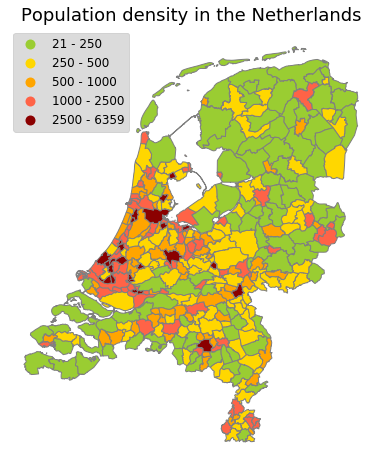

In [18]:
fig, ax = plt.subplots(1, 1)                  # initializing a figure
fig.set_size_inches(8,8)                      # setting the size

cmap=custom_div_cmap(5, col1='yellowgreen',col2='gold',col3='orange',col4='tomato', col5='darkred')  

bins=[250, 500, 1000, 2500]                  # selecting classification bins
current_data.plot(column='Density', ax=ax, edgecolor='gray',
               cmap=cmap, legend=True, scheme='User_Defined', classification_kwds={'bins':bins}, 
               legend_kwds={'loc': 2, 'fontsize': 12, 'frameon':True})

# handling the legend appearance and labels
leg=ax.get_legend()
handles = leg.legendHandles
frame = leg.get_frame()
frame.set_facecolor('lightgray')
labels = ax.get_legend().get_texts()

for lbl in labels:                      # small loop to display legend labels as integers
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]   
    new_text = '%.0f - %.0f' % (float(lower), float(upper))
    lbl.set_text(new_text)

ax.axis('off')
ax.set_title('Population density in the Netherlands', fontsize=18)
fig.savefig('Population_NL.png', dpi=300)
plt.show()

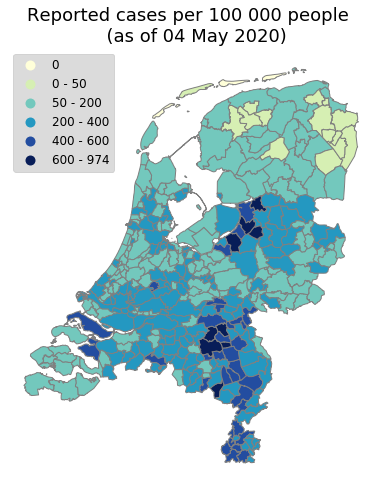

In [19]:
fig, ax = plt.subplots(1, 1)            # initializing a figure
fig.set_size_inches(8,8)                # setting the size

cmap = plt.cm.get_cmap('YlGnBu')        # selecting a colormap 

bins=[0, 50, 200, 400, 600]
current_data.plot(column='Reported_100000', ax=ax, edgecolor='gray',
               cmap=cmap, legend=True, scheme='User_Defined', classification_kwds={'bins':bins}, 
               legend_kwds={'loc': 2, 'fontsize': 12, 'frameon':True})

# handling the legend appearance and labels
leg=ax.get_legend()
handles = leg.legendHandles
frame = leg.get_frame()
frame.set_facecolor('lightgray')
labels = ax.get_legend().get_texts()

for lbl in labels:
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2] 
    if upper == '0.00':
        new_text = '%.0f' % (float(lower))
    else:
        new_text = '%.0f - %.0f' % (float(lower), float(upper))
   
    lbl.set_text(new_text)
    
ax.axis('off')
ax.set_title('Reported cases per 100 000 people \n  (as of '+date+')', fontsize=18)
fig.savefig('Reported_NL.png', dpi=300)

plt.show()

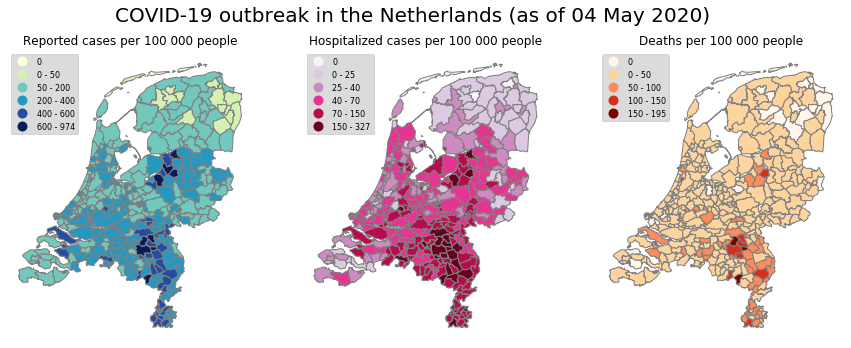

In [20]:
# making one figure with three subplots
fig, axes = plt.subplots(nrows=1, ncols=3,  figsize=(15, 5.5))

bins1=[0, 50, 200, 400, 600]
current_data.plot(column='Reported_100000', ax=axes[0], edgecolor='gray',
               cmap=plt.cm.get_cmap('YlGnBu'), legend=True, scheme='User_Defined', classification_kwds={'bins':bins1}, 
               legend_kwds={'loc': 2, 'fontsize': 8, 'frameon':True})
axes[0].set_title('Reported cases per 100 000 people', fontsize=12)

bins2=[0, 25, 40, 70, 150]
current_data.plot(column='Hospitalized_100000', ax=axes[1], edgecolor='gray',
               cmap=plt.cm.get_cmap('PuRd'), legend=True, scheme='User_Defined', classification_kwds={'bins':bins2}, 
               legend_kwds={'loc': 2, 'fontsize': 8, 'frameon':True})
axes[1].set_title('Hospitalized cases per 100 000 people', fontsize=12)

bins3=[0, 50, 100, 150]
current_data.plot(column='Deaths_100000', ax=axes[2], edgecolor='gray',
               cmap=plt.cm.get_cmap('OrRd'), legend=True, scheme='User_Defined', classification_kwds={'bins':bins3}, 
               legend_kwds={'loc': 2, 'fontsize': 8, 'frameon':True})
axes[2].set_title('Deaths per 100 000 people', fontsize=12)

# handling the legend appearance and labels
for ax in axes:
    ax.axis('off')
    
    leg=ax.get_legend()
    handles = leg.legendHandles
    frame = leg.get_frame()
    frame.set_facecolor('lightgray')
    labels = ax.get_legend().get_texts()

    for lbl in labels:
        label_text = lbl.get_text()
        lower = label_text.split()[0]
        upper = label_text.split()[2] 
        if upper == '0.00':
            new_text = '%.0f' % (float(lower))
        else:
            new_text = '%.0f - %.0f' % (float(lower), float(upper))

        lbl.set_text(new_text)

fig.suptitle('COVID-19 outbreak in the Netherlands (as of '+date+')', fontsize=20)
fig.savefig('COVID19_NL.png', dpi=400)
plt.show()

In [21]:
provinces=current_data['Province'].unique()
provinces

array(['Zuid-Holland', 'Noord-Brabant', 'Drenthe', 'Noord-Holland',
       'Gelderland', 'Friesland', 'Overijssel', 'Flevoland', 'Utrecht',
       'Groningen', 'Limburg', 'Zeeland'], dtype=object)

In [22]:
provinces_df = current_data.dissolve(by='Province', aggfunc = 'sum', as_index=False)

In [23]:
provinces_df.head()

,Province,geometry,MunicipalityNumber,ProvinceNumber,SecuretyRegionCode,GGD_RegionNumber,Shape__Area,Shape__Length,Date,Reported,Hospitalized,Deaths,Population,Reported_100000,Hospitalized_100000,Deaths_100000,ObjectId,Density
0,Drenthe,"POLYGON ((780883.958 6959538.619, 783716.150 6...",12478,264,36,8472,2.680380e+09,9.812038e+05,19062604800000,485,115,32,493657,1218.1,297.4,74.9,1661,3111.540837
1,Flevoland,"MULTIPOLYGON (((619153.720 6860094.462, 619099...",1737,144,150,13254,1.473397e+09,5.203477e+05,9531302400000,770,250,56,422979,1242.7,374.1,108.3,1121,3687.621466
2,Friesland,"MULTIPOLYGON (((565080.984 7037912.293, 565004...",11368,378,36,129708,3.560334e+09,1.564595e+06,28593907200000,538,126,58,649944,1204.4,245.6,119.7,3577,3528.321548
3,Gelderland,"MULTIPOLYGON (((608818.348 6847827.286, 609173...",28637,1275,349,87947,5.118394e+09,2.706344e+06,81016070400000,5225,1333,593,2086142,14168.4,3676.5,1636.3,8972,28477.292157
4,Groningen,"MULTIPOLYGON (((714037.505 7080419.437, 714168...",10632,240,12,1332,2.400965e+09,9.934728e+05,19062604800000,334,73,13,586061,536.4,184.5,19.9,2406,3497.706035


In [24]:
provinces_df=provinces_df.drop('MunicipalityNumber', axis=1)
provinces_df=provinces_df.drop('ProvinceNumber', axis=1)
provinces_df=provinces_df.drop('SecuretyRegionCode', axis=1)
provinces_df=provinces_df.drop('GGD_RegionNumber', axis=1)
provinces_df=provinces_df.drop('Shape__Length', axis=1)
provinces_df=provinces_df.drop('Date', axis=1)
provinces_df=provinces_df.drop('ObjectId', axis=1)

In [25]:
provinces_df['Reported_100000']=provinces_df['Reported']/provinces_df['Population']*1e5
provinces_df['Hospitalized_100000']=provinces_df['Hospitalized']/provinces_df['Population']*1e5
provinces_df['Deaths_100000']=provinces_df['Deaths']/provinces_df['Population']*1e5

In [26]:
provinces_df.head()

,Province,geometry,Shape__Area,Reported,Hospitalized,Deaths,Population,Reported_100000,Hospitalized_100000,Deaths_100000,Density
0,Drenthe,"POLYGON ((780883.958 6959538.619, 783716.150 6...",2.680380e+09,485,115,32,493657,98.246353,23.295527,6.482234,3111.540837
1,Flevoland,"MULTIPOLYGON (((619153.720 6860094.462, 619099...",1.473397e+09,770,250,56,422979,182.042134,59.104589,13.239428,3687.621466
2,Friesland,"MULTIPOLYGON (((565080.984 7037912.293, 565004...",3.560334e+09,538,126,58,649944,82.776362,19.386286,8.923846,3528.321548
3,Gelderland,"MULTIPOLYGON (((608818.348 6847827.286, 609173...",5.118394e+09,5225,1333,593,2086142,250.462337,63.897855,28.425678,28477.292157
4,Groningen,"MULTIPOLYGON (((714037.505 7080419.437, 714168...",2.400965e+09,334,73,13,586061,56.990655,12.456041,2.218199,3497.706035


In [27]:
values=[int(i) for i in provinces_df['Reported_100000'].tolist()]
sorted(values)

[56, 82, 98, 154, 182, 204, 214, 226, 237, 250, 321, 379]

In [28]:
provinces_df['coords'] = provinces_df['geometry'].apply(lambda x: x.representative_point().coords[:])
provinces_df['coords'] = [coords[0] for coords in provinces_df['coords']]

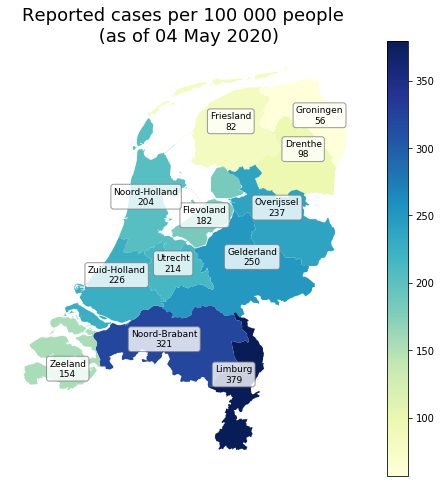

In [29]:
fig, ax = plt.subplots(1, 1)                 # initializing a figure
fig.set_size_inches(8,8)                     # setting the size

cmap = plt.cm.get_cmap('YlGnBu')

values=[int(i) for i in provinces_df['Reported_100000'].tolist()]     # listing all column values from the DataFrame
bins=sorted(values)

provinces_df.plot(column='Reported_100000', ax=ax, 
               cmap=cmap, legend=True)

# adding an annotation
bbox_props = dict(boxstyle="round", fc="w", ec="gray", alpha=0.8,lw=1)
for idx, row in provinces_df.iterrows():
    ax.annotate(s=row['Province']+'\n'+str(int(row['Reported_100000'])), xy=row['coords'], color='black',
                 horizontalalignment='center', bbox=bbox_props, fontsize=9)

ax.axis('off')
ax.set_title('Reported cases per 100 000 people \n (as of '+date+')', fontsize=18)

fig.savefig('Reported_Provinces_NL.png', dpi=400)
plt.show()